<a href="https://colab.research.google.com/github/SajawalHassan/digit_classifier_dl/blob/main/digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Dataset

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

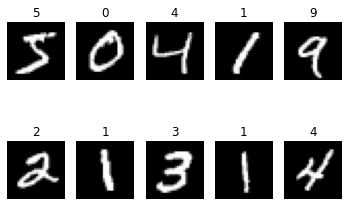

In [ ]:
figure, axes = plt.subplots(2, 5)
for index, ax in enumerate(axes.ravel()):
  if index < 10:
    ax.imshow(X_train[index], cmap="gray")
    ax.set_title(str(y_train[index]))
    ax.axis("off")

plt.show()

# 2. Training neural network

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 1, 1, 64)       

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2148 - accuracy: 0.9330 - val_loss: 0.0976 - val_accuracy: 0.9716
Epoch 2/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0728 - accuracy: 0.9775 - val_loss: 0.0846 - val_accuracy: 0.9743
Epoch 3/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0522 - accuracy: 0.9838 - val_loss: 0.0615 - val_accuracy: 0.9828
Epoch 4/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0399 - accuracy: 0.9877 - val_loss: 0.0540 - val_accuracy: 0.9845
Epoch 5/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0327 - accuracy: 0.9895 - val_loss: 0.0477 - val_accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0262 - accuracy: 0.9917 - val_loss: 0.0451 - val_accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0221 - accuracy: 0.9929 - val_loss: 0.0423 -

# 3. Evaluating model

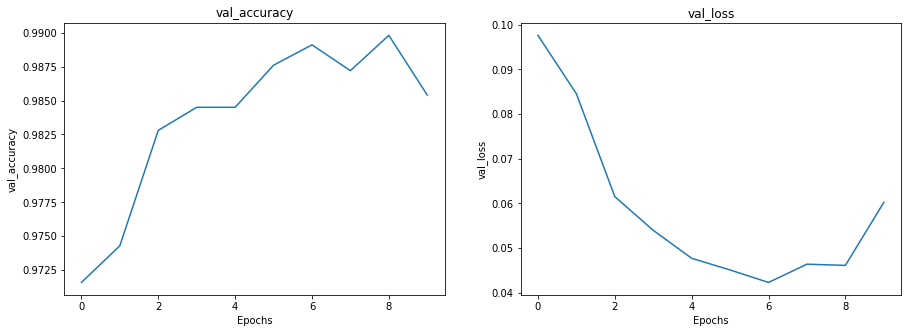

In [ ]:
figure, axes = plt.subplots(1, 2, figsize=(15, 5))
val_metrics_list = ["val_accuracy", "val_loss"]
for index, ax in enumerate(axes.ravel()):
  ax.plot(history.history[val_metrics_list[index]])
  ax.set_title(val_metrics_list[index])
  ax.set_ylabel(val_metrics_list[index])
  ax.set_xlabel("Epochs")

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

313/313 - 3s - loss: 0.0602 - accuracy: 0.9854 - 3s/epoch - 9ms/step


In [ ]:
print(f"Loss: {test_loss} & Accuracy: {test_accuracy}")

Loss: 0.06024239584803581 & Accuracy: 0.9854000210762024


# 4. Predicting with model

In [ ]:
num_images_predict = 20

# Predict
y_pred = model.predict(X_test[:num_images_predict])

# get the predicted class for each input by taking index for the biggest values
y_pred_class = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 103ms/step


In [ ]:
y_pred_class

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

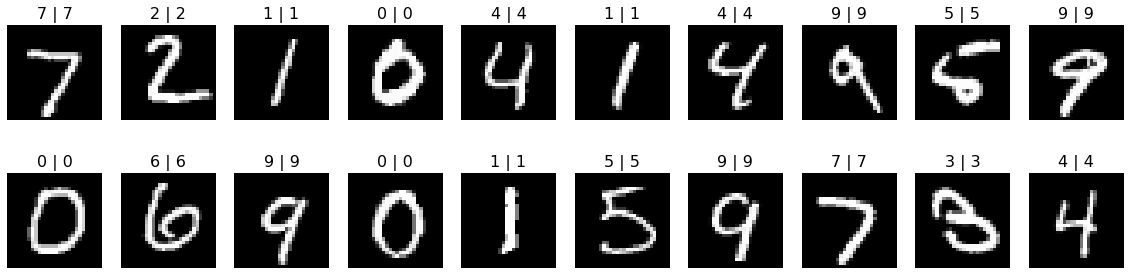

In [ ]:
# Plotting predictions with images and labels. {Predicted value | True value}

figure, axes = plt.subplots(2, 10, figsize=(20, 5))
for index, ax in enumerate(axes.ravel()):
  if index < num_images_predict:
    ax.imshow(X_test[index], cmap="gray")
    ax.set_title(f"{str(y_pred_class[index])} | {str(y_test[index])}", fontsize=16)
    ax.axis("off")

plt.show()

# 5. Save and load model

In [ ]:
model.save('model/digit_classifier')

In [ ]:
digit_classifier_trained_model = tf.keras.models.load_model("./model/digit_classifier")

digit_classifier_trained_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 1, 1, 64)       

# 6. Download model

In [ ]:
!rm -fr log.zip

In [ ]:
# Zip folder
!zip -r digit_classifier.zip model/digit_classifier/

# Then just right click on the file and click download

  adding: model/digit_classifier/ (stored 0%)
  adding: model/digit_classifier/keras_metadata.pb (deflated 91%)
  adding: model/digit_classifier/fingerprint.pb (stored 0%)
  adding: model/digit_classifier/saved_model.pb (deflated 89%)
  adding: model/digit_classifier/variables/ (stored 0%)
  adding: model/digit_classifier/variables/variables.index (deflated 64%)
  adding: model/digit_classifier/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: model/digit_classifier/assets/ (stored 0%)
